In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib as plt

filename = 'GEDI01_B_2019108002011_O01959_T03909_02_003_01.h5'
hdf = h5py.File(filename, 'r')

In [3]:
group1 = hdf.get('BEAM0000')

for key in group1:
    print(key)

all_samples_sum
ancillary
beam
channel
delta_time
geolocation
geophys_corr
master_frac
master_int
noise_mean_corrected
noise_stddev_corrected
nsemean_even
nsemean_odd
rx_energy
rx_offset
rx_open
rx_sample_count
rx_sample_start_index
rxwaveform
selection_stretchers_x
selection_stretchers_y
shot_number
stale_return_flag
th_left_used
tx_egamplitude
tx_egamplitude_error
tx_egbias
tx_egbias_error
tx_egflag
tx_eggamma
tx_eggamma_error
tx_egsigma
tx_egsigma_error
tx_gloc
tx_gloc_error
tx_pulseflag
tx_sample_count
tx_sample_start_index
txwaveform


In [64]:
# exlore items in a group to see if they're all datasets or subgroups
group1_items = list(group1.items())
print('Items in BEAM0000', group1_items)

Items in BEAM0000 [('all_samples_sum', <HDF5 dataset "all_samples_sum": shape (249810,), type "<u4">), ('ancillary', <HDF5 group "/BEAM0000/ancillary" (3 members)>), ('beam', <HDF5 dataset "beam": shape (249810,), type "<u2">), ('channel', <HDF5 dataset "channel": shape (249810,), type "|u1">), ('delta_time', <HDF5 dataset "delta_time": shape (249810,), type "<f8">), ('geolocation', <HDF5 group "/BEAM0000/geolocation" (39 members)>), ('geophys_corr', <HDF5 group "/BEAM0000/geophys_corr" (8 members)>), ('master_frac', <HDF5 dataset "master_frac": shape (249810,), type "<f8">), ('master_int', <HDF5 dataset "master_int": shape (249810,), type "<u4">), ('noise_mean_corrected', <HDF5 dataset "noise_mean_corrected": shape (249810,), type "<f8">), ('noise_stddev_corrected', <HDF5 dataset "noise_stddev_corrected": shape (249810,), type "<f8">), ('nsemean_even', <HDF5 dataset "nsemean_even": shape (249810,), type "<f4">), ('nsemean_odd', <HDF5 dataset "nsemean_odd": shape (249810,), type "<f4">

In [56]:
# get a list of the datasets in a group, leave subgroup 'ancillary' out
def get_list(group): 
    result = []
    for key in group.keys():
        if key != 'ancillary':
            result.append(key)
    return result

In [57]:
def get_arrays(group):
    for key in group:
        for k in get_list(group):
            if key == k:
                all_data = [np.array(group.get(key))]
    return all_data

In [58]:
get_arrays(group1)

[array([246.21742, 246.26566, 246.51549, ..., 246.97083, 246.61905,
        246.41533], dtype=float32)]

In [5]:
# get an array of a dataset contained in the group
all_samples_sum = np.array(group1.get('all_samples_sum'))
delta_time = np.array(group1.get('delta_time'))

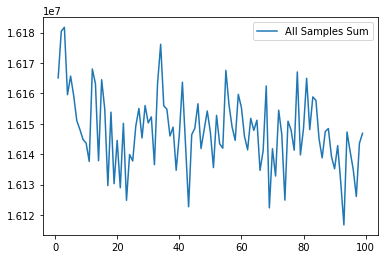

In [59]:
# make pandas dataframe from an array
df = pd.DataFrame(all_samples_sum)
df.columns = ['All Samples Sum']
# print(df)
df.iloc[1:100].plot() # plotting subset of df

In [8]:
# combine two (or more) datasets into one dataframe
df_from_arr = pd.DataFrame(data=[all_samples_sum, delta_time])
df3 = df_from_arr.T
df3.columns = ['all_samples_sum', 'delta_time']